# Load dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfConfirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
dfDeath = pd.read_csv("time_series_covid19_deaths_global.csv")
dfRecovered = pd.read_csv("time_series_covid19_recovered_global.csv")

#rename columns
dfConfirmed.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)
dfDeath.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)
dfRecovered.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)

data = [dfConfirmed,dfDeath,dfRecovered]

# Data visualization on provinces

##### Plot confirmed, recovered and deaths per regios

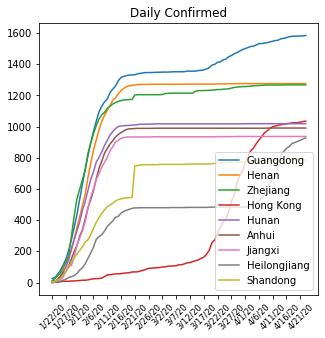

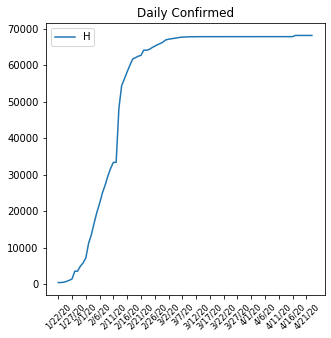

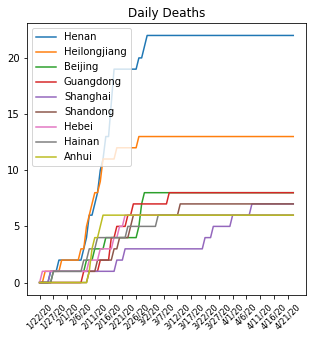

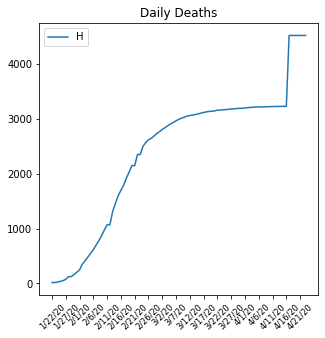

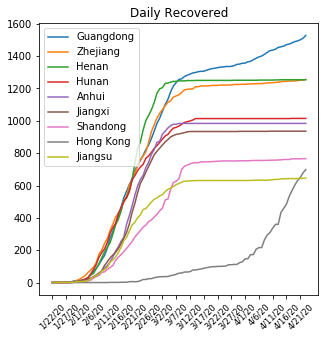

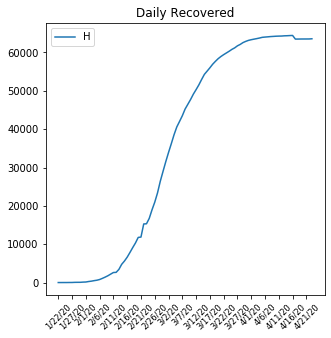

In [8]:
def selectCountry(countryName,df):
    df = df.loc[df['country'] == countryName]
    df = df.drop(['Lat','Long','country'], axis=1)
    df = df.set_index('province').T
    sortedProvinces = df.max().sort_values(ascending=False).index
    return sortedProvinces,df

def plot_regions(df,plotted_columns,title): 
    fig,ax = plt.subplots(figsize=[5,5])
    
    ind = np.arange(0,len(df),5)
    indNames = [df.index[i] for i in range(len(df)) if i %5 ==0]

    lineObjects = ax.plot(df[plotted_columns]);
    plt.xticks(ind,indNames, rotation=45,fontsize='small')
    plt.legend(iter(lineObjects), (plotted_columns))
    plt.title(title)
    plt.show();
    

datasets = [dfConfirmed, dfDeath, dfRecovered]
countries = ['China']
provinces,dfs = [],[]
titles = ['Daily Confirmed','Daily Deaths', 'Daily Recovered'] 

for country in countries:
    for dataset in datasets:       
        provinces.append(selectCountry(country, dataset)[0])
        dfs.append(selectCountry(country, dataset)[1])

for i in range(len(dfs)):
    plot_regions(dfs[i],provinces[i][1:10],titles[i])
    plot_regions(dfs[i],provinces[i][0],titles[i])

# Experiments

##### Drop lat, long and province columns

##### Check countries with top confirmed cases in last day

In [ ]:
# lastCol = dfConfirmed.iloc[:,[1,-1]]
# sorted_last = last.sort_values(by=last.columns[1],ascending=False)
# sorted_last = sorted_last.iloc[:30,:]
# # topTen = sorted_last.country.tolist()
# topTwenty = sorted_last.country.tolist()
# # topTwenty
# # nonEurope = ['US', 'Iran', 'China',"Brazil", "India", "Canada", "Peru"]
# # topEurope = [topTwenty[i] for i in topTwenty and i not in nonEurope]

### Take only european countries

In [3]:
europe = pd.read_csv("Countries-Europe.csv")
europe = europe.name.tolist()
europe = list(set([i for i in dfConfirmed.country if i in europe])) #get european countries present in dataset

#define european dataframes
EuConfirmed = dfConfirmed[dfConfirmed.country.isin(europe)]
EuRecovered = dfRecovered[dfRecovered.country.isin(europe)]
EuDeath = dfDeath[dfDeath.country.isin(europe)]

#store dataframes in list
EU = [EuConfirmed,EuRecovered,EuDeath]
EUNames = ['EuConfirmed', 'EuRecovered','EuDeath']

#Filter out non european provinces and drop lat, long and province column
for i in range(len(EU)):
    EU[i] = EU[i].loc[EU[i].province.isnull()]
    EU[i] = EU[i].drop(['Lat','Long','province'],axis=1)

##### EXPERIMENT: Check for european provinces only don't need to load anymore

In [8]:
# #Sort out non european provinces
# europeans = [i for i in dfConfirmed.country if i in europe]
# CountsEU={}
# for item in europeans:
#     CountsEU[item]=europeans.count(item)
    
# multipleEU = list(dict((k, v) for k, v in CountsEU.items() if v > 1).keys())

# EuConfirmed = EuConfirmed[EuConfirmed.country.isin(CountsEU)]

# multipleProvinces = multipleProvinces.sort_values(by='country')
# multipleProvinces = multipleProvinces[multipleProvinces.province.isnull()]

Conclusion: if provinces == NaN, country == in europe

##### Seperate top 5 countries by rest by numbers of last taken data

In [4]:
EUSorted = EU[0].sort_values(by=['4/30/20'],ascending=False) #select top 5 based on latest measurements

#Define top 5 countries with highest rates and others
EuHigh = list(EUSorted.country.iloc[:5])
EuLow = (EUSorted.country.iloc[5:])
dfHigh,dfLow = [],[]
for dataset in EU: 
    dfHigh.append(dataset[dataset.country.isin(EuHigh)])
    dfLow.append(dataset[dataset.country.isin(EuLow)])

##### Plot top 5 countries and rest separately

In [7]:
EU[0]

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
16,Austria,0,0,0,0,0,0,0,0,0,...,14873,14925,15002,15071,15148,15225,15274,15357,15402,15452
22,Belarus,0,0,0,0,0,0,0,0,0,...,6723,7281,8022,8773,9590,10463,11289,12208,13181,14027
23,Belgium,0,0,0,0,0,0,0,0,0,...,40956,41889,42797,44293,45325,46134,46687,47334,47859,48519
27,Bosnia and Herzegovina,0,0,0,0,0,0,0,0,0,...,1342,1368,1413,1421,1486,1516,1565,1585,1677,1757
30,Bulgaria,0,0,0,0,0,0,0,0,0,...,975,1024,1097,1234,1247,1300,1363,1399,1447,1506
87,Croatia,0,0,0,0,0,0,0,0,0,...,1908,1950,1981,2009,2016,2030,2039,2047,2062,2076
90,Cyprus,0,0,0,0,0,0,0,0,0,...,784,790,795,804,810,817,822,837,843,850
94,Denmark,0,0,0,0,0,0,0,0,0,...,7695,7912,8073,8210,8445,8575,8698,8851,9008,9158


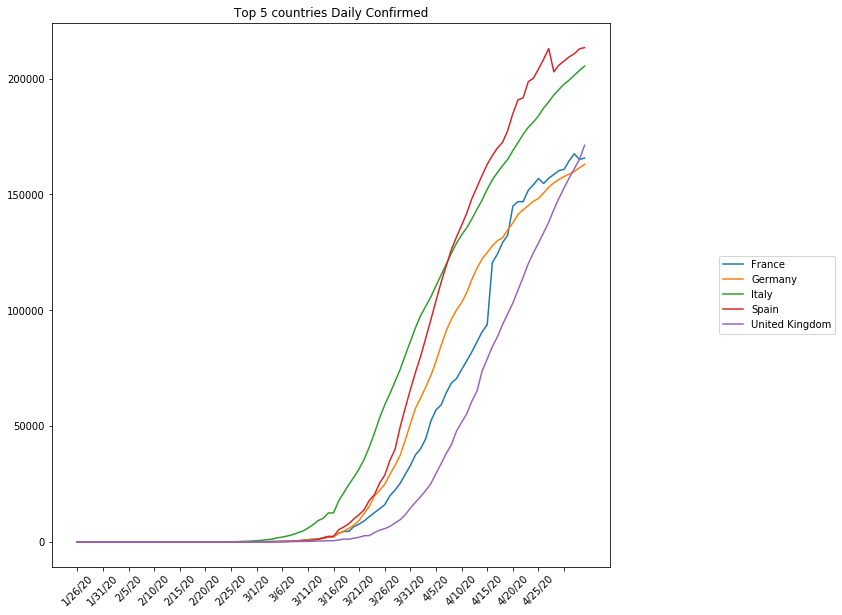

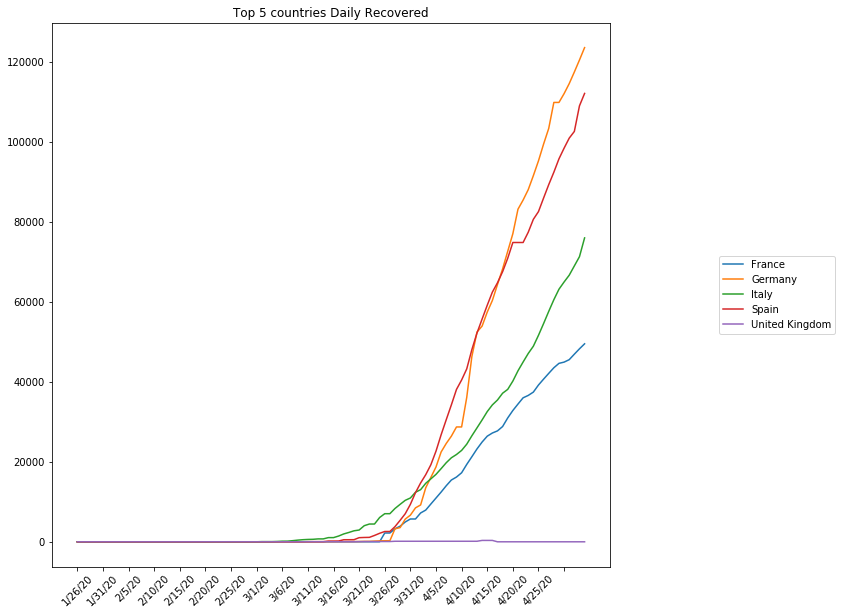

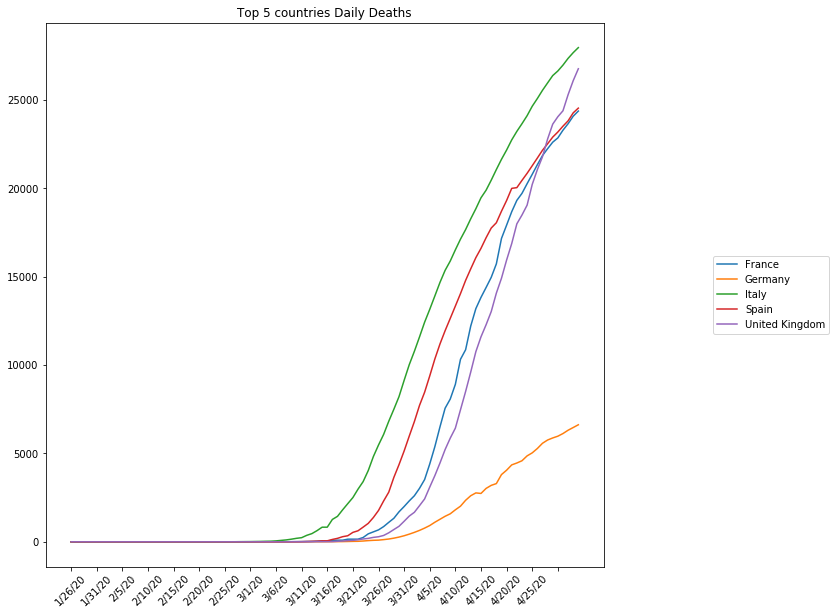

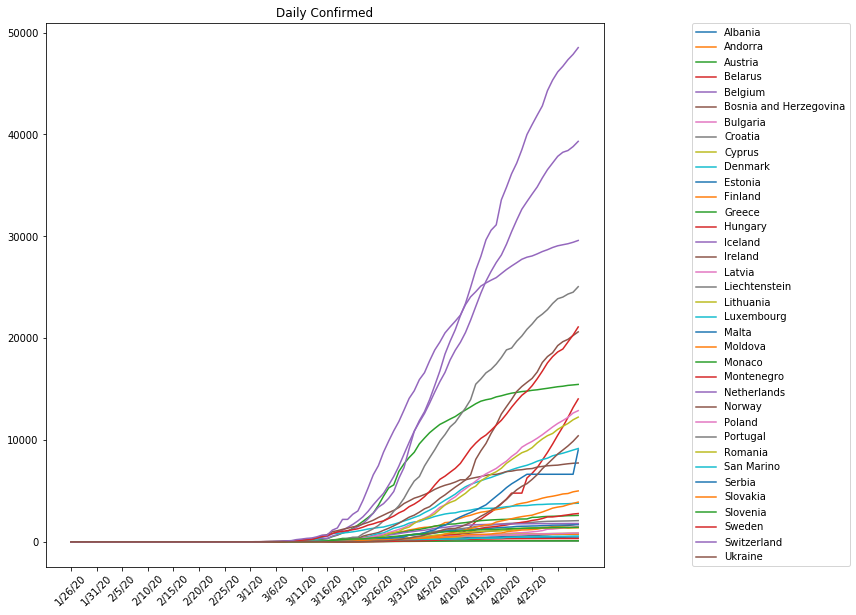

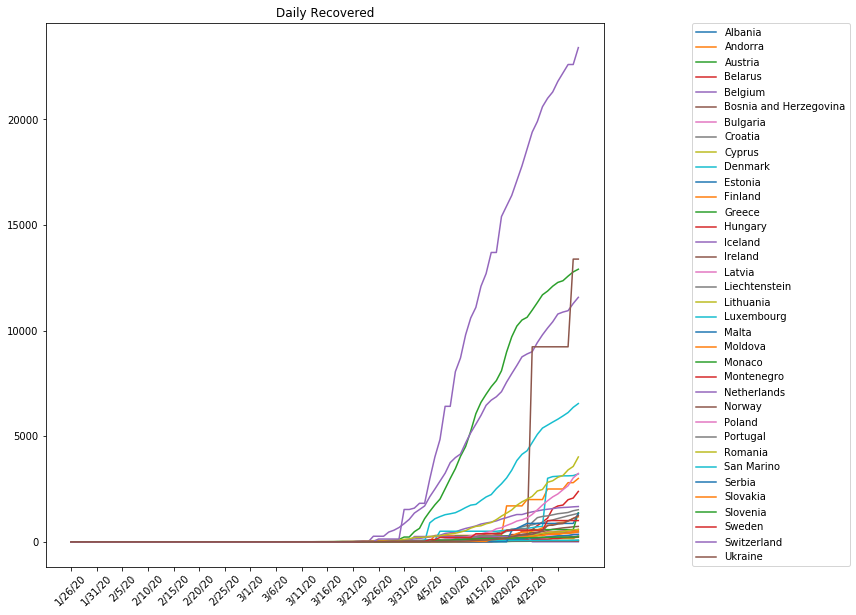

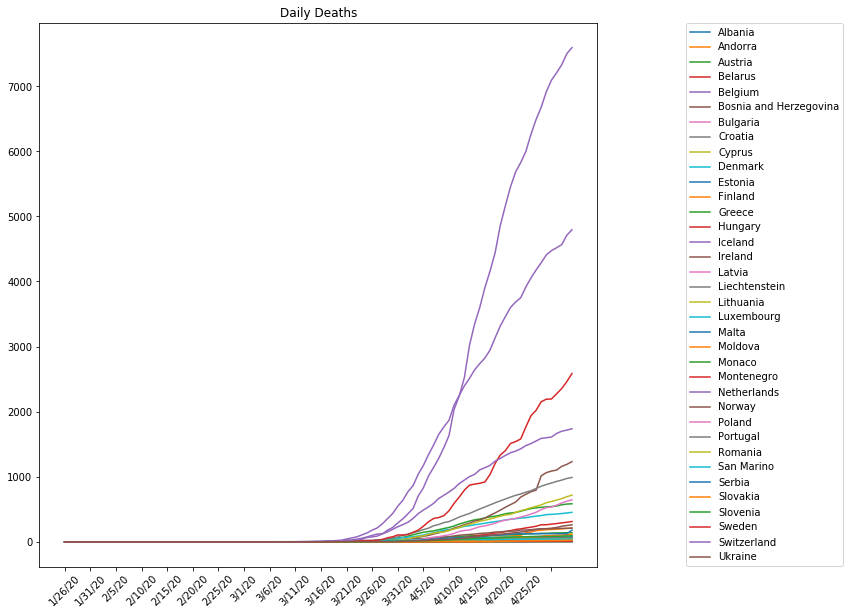

In [51]:
titlesTop = ['Top 5 countries Daily Confirmed', 'Top 5 countries Daily Recovered', 'Top 5 countries Daily Deaths']
titles = ['Daily Confirmed', 'Daily Recovered', 'Daily Deaths']

indexData = EU[0].iloc[:,1:].shape[1]


def plotfigs(dfs,titles):
    i = 0
    for dataset in dfs:
        fix,ax = plt.subplots(figsize=[10,10])
        for index,row in dataset.iterrows():    
            label = row.country
            data = row[1:]
            ind = np.arange(0,indexData,5)
            indNames = [row.index[i] for i in range(1,indexData) if i % 5 == 0]
            
            plt.plot(data,label=label)   
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
            plt.xticks(ind,indNames,rotation=45)
            plt.title(titles[i])
            lgd = ax.legend(loc=10, bbox_to_anchor=(1.3,0.5))
            plt.savefig(titles[i]+' week18'+'.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
        i+=1
        
plotfigs(dfHigh,titlesTop)
plotfigs(dfLow,titles)

##### OLD

In [18]:
# europe = pd.read_csv("Countries-Europe.csv")
# europe = europe.name.tolist()
# europeans = list(set([i for i in dfConfirmed.country if i in europe]))

# EuConfirmed = dfConfirmed[dfConfirmed.country.isin(europeans)]
# EuRecovered = dfRecovered[dfRecovered.country.isin(europeans)]
# EuDeath = dfDeath[dfDeath.country.isin(europeans)]


##### OLD: Plot confirmed per country

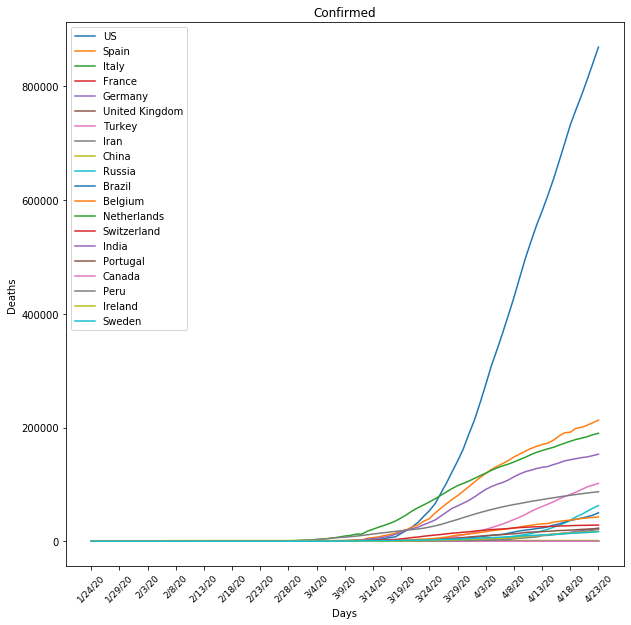

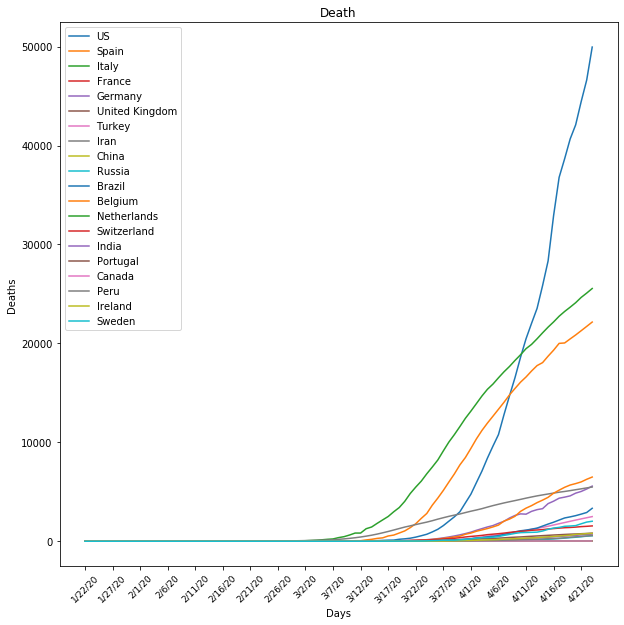

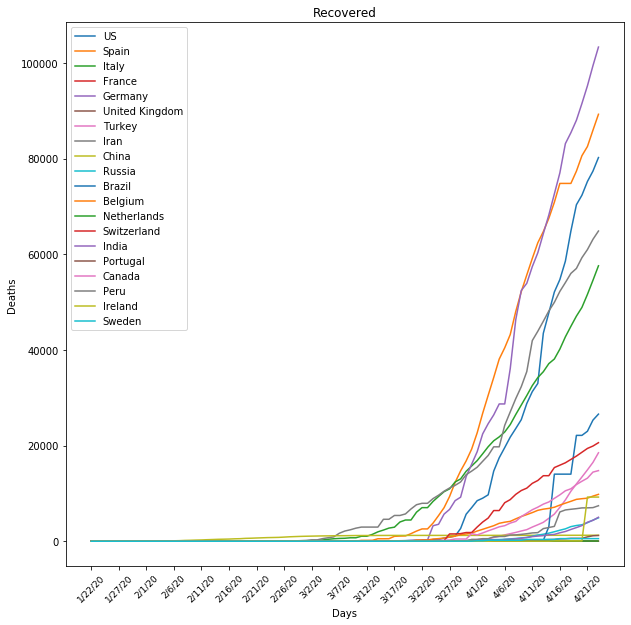

In [82]:
def plot_days(df,countryname,title):
    country = df[df.country == countryname]
    country = country.drop(country.columns[0:4], axis=1) #only keep days
    if len(country) > 1:
        country.drop(country.head(len(country)-1).index,inplace=True) #select only one country
    country = country.T
    
    ind = np.arange(0,len(country),5)
    indNames = [country.index[i] for i in range(len(country)) if i %5 == 0]
    
    plt.plot(country.index,country,label=countryname)
    plt.xticks(ind,indNames,rotation=45,fontsize=9);
    plt.xlabel("Days")
    plt.ylabel("Deaths")
    plt.title(title)
    plt.legend()
    plt.savefig(title+'.png')
    return country
    
# countries = ['Netherlands','Austria','China']
datasets = [dfConfirmed, dfDeath, dfRecovered]
titles = ['Confirmed', 'Death', 'Recovered']
countries = topTen
europeans = [topTen[i] for i in topTen]


for i in range(len(datasets)): 
    fig,ax=plt.subplots(figsize=[10,10])
    for k in countries: 
         plot_days(datasets[i],k,titles[i]);


# Do predictions

## Univariate predictions: SARIMAX

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

##### Preprocessing datasets

In [6]:
#Get increasing index
def reset_index(df):
    index = np.arange(1,len(df)+1)
    df = df.set_index(index)
    return df

In [178]:
dfHigh[1]

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
108,France,0,0,0,0,0,0,0,0,0,...,39181,40657,42088,43493,44594,44903,45513,46886,48228,49476
112,Germany,0,0,0,0,0,0,0,0,0,...,95200,99400,103300,109800,109800,112000,114500,117400,120400,123500
131,Italy,0,0,0,0,0,0,0,0,0,...,51600,54543,57576,60498,63120,64928,66624,68941,71252,75945
199,Spain,0,0,0,0,0,0,0,0,0,...,82514,85915,89250,92355,95708,98372,100875,102548,108947,112050
223,United Kingdom,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
dfHigh[0].T-1

,116,120,137,201,223
country,France,Germany,Italy,Spain,United Kingdom
1/22/20,0,0,0,0,0
1/23/20,0,0,0,0,0
1/24/20,2,0,0,0,0
1/25/20,3,0,0,0,0
...,...,...,...,...,...
4/26/20,160847,157770,197675,207634,152840
4/27/20,164589,158758,199414,209465,157149
4/28/20,167605,159912,201505,210773,161145
4/29/20,165093,161539,203591,212917,165221


In [45]:
index = pd.date_range(start='2020-01-22', periods=len(dfHigh), freq='D')
index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24'], dtype='datetime64[ns]', freq='D')

In [52]:
print(len(dfHigh[0].T)-1)

100


In [75]:
def prep_datasets(lenDf,dfHigh):
    dataFrames = [[] for i in range(lenDf)]
    country5 = [[] for i in range(lenDf)] 
    
    for i in range(len(dfHigh)):
        df = dfHigh[i].T
        new_header = df.iloc[0] #grab the first row for the header
        df = df[:][1:] #take the data less the header row
        df.columns = new_header #set countries as header
        dataFrames[i] = df

        index = pd.date_range(start='2020-01-22', periods=len(df), freq='D')
        countries = []
        for country in df.columns: 
            data = pd.to_numeric(df[country])
            data = pd.Series(np.asarray(data),index=index,name=country)
            countries.append(data)
        country5[i] = countries
    return dataFrames,country5
    
    
countryNames = []
lenDf = len(dfHigh)
dataFrames,countries = prep_datasets(lenDf,dfHigh)
countryNames.append(dataFrames[0].columns)


In [78]:
print(len(countries))

3


In [89]:
columns = list(dfHigh[0].iloc[:,0])

In [93]:
np.array(countries[0])

array([[     0,      0,      2,      3,      3,      3,      4,      5,
             5,      5,      6,      6,      6,      6,      6,      6,
             6,     11,     11,     11,     11,     11,     11,     11,
            12,     12,     12,     12,     12,     12,     12,     12,
            12,     12,     14,     18,     38,     57,    100,    130,
           191,    204,    285,    377,    653,    949,   1126,   1209,
          1784,   2281,   2281,   3661,   4469,   4499,   6633,   7652,
          9043,  10871,  12612,  14282,  16018,  19856,  22304,  25233,
         29155,  32964,  37575,  40174,  44550,  52128,  56989,  59105,
         64338,  68605,  70478,  74390,  78167,  82048,  86334,  90676,
         93790, 120633, 124298, 129257, 132473, 144944, 146923, 146906,
        151808, 154188, 156921, 154715, 157026, 158636, 160292, 160847,
        164589, 167605, 165093, 165764],
       [     0,      0,      0,      0,      0,      1,      4,      4,
             4,      5,

In [98]:
df = pd.DataFrame(np.array(countries[0]),columns=columns)
df

ValueError: Shape of passed values is (5, 100), indices imply (5, 5)

In [68]:
# conf_countries_5,conf_countryNames_5 = [],[]
# index = pd.date_range(start='2020-01-24', periods=len(Confirmed), freq='D')

# for country in Confirmed.columns: 
#     data = pd.to_numeric(Confirmed[country])
#     data = pd.Series(np.asarray(data),index=index)
#     conf_countries_5.append(data)
#     conf_countryNames_5.append(str(country))

##### OLD preprocessing:

In [69]:
# #Store top 5 confirmed, recovered and death in lists
# Confirmed = dfHigh[0].T
# new_header = Confirmed.iloc[0] #grab the first row for the header
# Confirmed = Confirmed[1:] #take the data less the header row
# Confirmed.columns = new_header #set countries as header

# conf_countries_5,conf_countryNames_5 = [],[]
# index = pd.date_range(start='2020-01-24', periods=len(Confirmed), freq='D')

# for country in Confirmed.columns: 
#     data = pd.to_numeric(Confirmed[country])
#     data = pd.Series(np.asarray(data),index=index)
#     conf_countries_5.append(data)
#     conf_countryNames_5.append(str(country))


In [74]:
# Confirmed = dfHigh[0].T
# new_header = Confirmed.iloc[0] #grab the first row for the header
# Confirmed = Confirmed[1:] #take the data less the header row
# Confirmed.columns = new_header #set countries as header



# Germany = Confirmed.Germany
# Germany = pd.to_numeric(Germany)
# index = pd.date_range(start='2020-01-24', periods=len(Confirmed), freq='D')
# data = pd.Series(np.asarray(Germany),index=index)



C:\Users\zrivai\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [133]:
from datetime import datetime
ind = np.arange(0,len(datasets[0]),5)
indNames = [index[i].strftime("%Y/%m/%d") for i in range(len(datasets[0])) if i %5 ==0]


In [232]:
countries[0][0]

2020-01-24         0
2020-01-25         0
2020-01-26         2
2020-01-27         3
2020-01-28         3
               ...  
2020-04-28    160847
2020-04-29    164589
2020-04-30    167605
2020-05-01    165093
2020-05-02    165764
Freq: D, Length: 100, dtype: int64

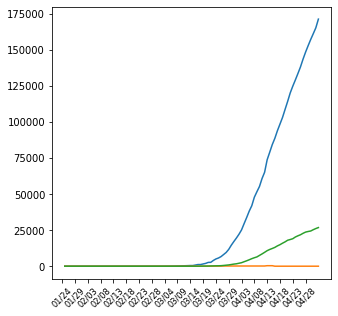

In [252]:
datasets = countries
# titles = ["Cumulative Confirmed", "Recovered", "Deaths"]
titles = countryNames

import warnings
warnings.filterwarnings('ignore')

def model_stuff(datasets,n,titles,maintitle):
    fig,ax = plt.subplots(figsize=[5,5])
    t=0
    for Set in datasets:
        for country in range(len(Set)): 
#             data = combo[country]
#             lendata = len(data)

#             ind = np.arange(0,len(data),5)
#             indNames = [index[i].strftime("%m/%d") for i in range(len(data)) if i %5 ==0]
            
# #             for i in range(n):
# #     #             if i % 5 == 0:
# #     #                 print("{} Rounds done".format(i))
#             mod = sm.tsa.SARIMAX(data, order=(1, 0, 0), trend='c')
#             res = mod.fit()
#             new = pd.DataFrame([pd.Series([int(res.forecast())])])

#             data = pd.concat([data,new])
#             data = reset_index(data)

#         plt.plot(data[:lendata])
#         plt.plot(data[:lendata],label=titles[country])
#         plt.plot(data[lendata:],ls='--')
#         plt.title('Daily {} top 5 countries in Europe'.format(maintitle[t]))
#         plt.xticks(ind,indNames, rotation=45,fontsize='small');
#         plt.legend()
#         t +=1

n= 10
maintitle = ['Confirmed', 'Recovered', 'Death']
model_stuff(datasets,n,titles, maintitle)

# for i in dfHigh:
#     model_stuff(datasets,n,titles, maintitle)

## Kalman filter